In [26]:
# import useful library and tools
import numpy as np
import pandas as pd
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.font_manager import FontProperties



In [27]:
# https://dartbrains.org/content/Connectivity.html

parent_dir = '/Volumes/language/language/NeuroImaging_Scripts/voxel_stats_data'
timeseries_sub_13281 = pd.read_csv(os.path.join(parent_dir, 'controls/TimeSeries/13281_2016-10-14_rois_timeseries.csv'), header=None)
#drop the 233rd column from the timeseries_sub_13281
timeseries_sub_13281 = timeseries_sub_13281.drop(timeseries_sub_13281.columns[233], axis=1)


In [28]:
# # First we fetch the Yeo atlas
# from nilearn import datasets

# atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
# atlas_yeo = atlas_yeo_2011.thick_7

# # Let's now plot it
# from nilearn import plotting

# plotting.plot_roi(
#     atlas_yeo,
#     title="Yeo atlas 7 networks",
#     cut_coords=(8, -4, 9),
#     colorbar=True,
#     cmap="Paired",
# )

In [29]:
# Now we can extract the regions' labels and names based on the Yeo atlas

df_networks = pd.read_csv(os.path.join(parent_dir, 'subregions_Yeo7networks.csv'))
Yeo_network_index = df_networks.sort_values(by=['Yeo_7network'])
Yeo_network_index = Yeo_network_index[Yeo_network_index['Yeo_7network'] != 0]
Yeo_network_index = Yeo_network_index.loc[:, ~Yeo_network_index.columns.str.contains('^Unnamed')]

Yeo_network_index


,Label,subregion_name,region,Yeo_7network,Yeo_17network
197,198,vmPOS,MVOcC_R_5_5,1,2
113,114,TL,PhG_R_6_3,1,15
112,113,TL,PhG_L_6_3,1,15
111,112,A35/36c,PhG_R_6_2,1,15
196,197,vmPOS,MVOcC_L_5_5,1,2
...,...,...,...,...,...
32,33,A45c,IFG_L_6_3,7,17
180,181,A23v,CG_L_7_4,7,15
178,179,A32p,CG_L_7_3,7,16
186,187,A32sg,CG_L_7_7,7,16


In [30]:
# Define label names Yeo 7 networks
Yeo_7network_names = {
    1: 'Visual',
    2: 'Somatomotor',
    3: 'Dorsal Attention',
    4: 'Ventral Attention',
    5: 'Limbic',
    6: 'Frontoparietal',
    7: 'Default'
}
#idx_to_label = label_names;

In [31]:
# Define label names Yeo 17 networks
Yeo_17network_names = {
    1: 'Visual peripheral',
    2: 'Visual central',
    3: 'Somato-motor A',
    4: 'Somato-motor B',
    5: 'Dorsal attention A',
    6: 'Dorsal attention B',
    7: 'Ventral attention',
    8: 'Salience',
    9: 'Limbic-1',
    10: 'Limbic-2',
    11: 'Control C',
    12: 'Control A',
    13: 'Control B',
    14: 'Default D (Auditory)',
    15: 'Default C',
    16: 'Default A',
    17: 'Default B'
}

Text(0, 0.5, 'Amplitude')

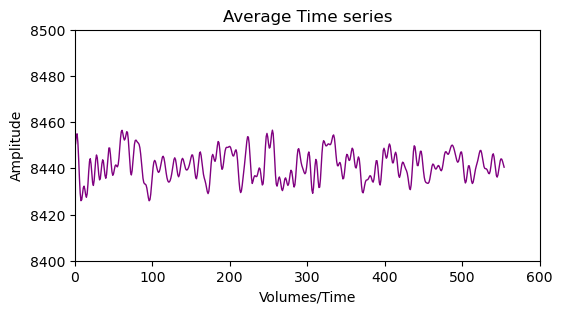

In [32]:
# Extract the first column as label_regions and exclude the first 4 columns
label_regions = timeseries_sub_13281.iloc[:, 0]
data_to_plot = timeseries_sub_13281.iloc[:, 4:]

# Compute the average and standard deviation for each column
avg_values = data_to_plot.mean(axis=0).values
std_values = data_to_plot.std(axis=0).values

# Create an x-axis with the desired number of points
x_values = range(1, len(avg_values) + 1)
plt.figure(figsize=(6, 3))

#Plotting the data
plt.plot(x_values, avg_values, color='purple', lw=1, label='Average')
#plt.fill_between(x_values, avg_values - std_values, avg_values + std_values, color='purple', alpha=0.2, label='Standard Deviation')

# Setting x and y axis range
x_min, x_max = 0, 600  # adjust these values as required
y_min, y_max = 8400, 8500  # adjust these values as required

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Average Time series")
plt.xlabel("Volumes/Time")
plt.ylabel("Amplitude")


In [33]:
# Create a mapping dictionary from df_networks
network_mapping = df_networks.set_index('Label')['Yeo_7network'].to_dict()

# Map the Yeo_7network values to df_data based on the index
#df_data['Yeo_7network'] = df_data.index + 1  # Assuming index starts at 0
#df_data['Yeo_7network'] = df_data['Yeo_7network'].map(network_mapping)

In [34]:
# Dictionary
label_mapping = df_networks.set_index('Label')['region'].to_dict()

# Function to plot time series for a specific region
def plot_time_series_for_label(label_name):
    # Get the label number using the reverse dictionary (name to label)
    label_number = {v: k for k, v in label_mapping.items()}[label_name]

    # Extract data for the given label and convert it to a series
    data_series = timeseries_sub_13281[timeseries_sub_13281.iloc[:, 0] == label_number].iloc[:, 4:].transpose().iloc[:, 0]
    
    # Create an x-axis with the desired number of points
    x_values = range(1, len(data_series) + 1)    
    plt.figure(figsize=(10, 5))
    # Plotting the data
    plt.plot(x_values, data_series, color='purple', lw=1, label=label_name)
    
    # Setting x and y axis range
    x_min, x_max = 0, 600  # adjust these values as required
    y_min, y_max = data_series.min(), data_series.max()  # adjust these values as required

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(f"Time Series for {label_name}")
    plt.xlabel("Volumes/Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

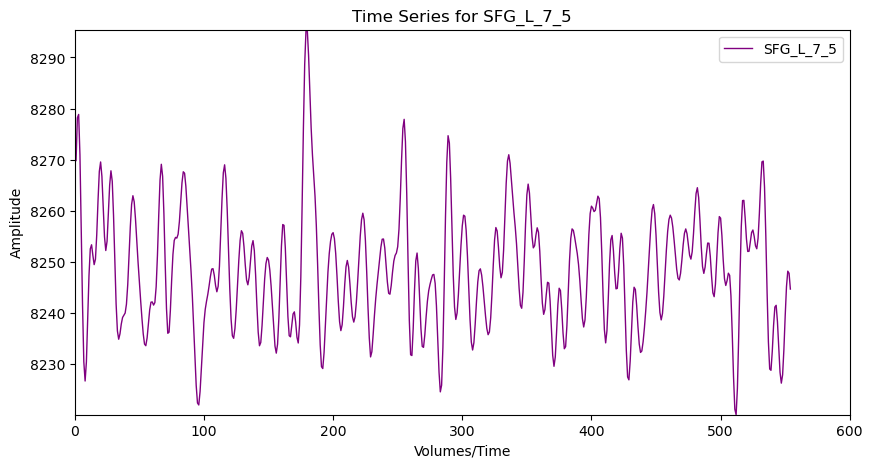

In [35]:
# Example usage:
region_name_to_plot = "SFG_L_7_5" # replace this with the desired region name
plot_time_series_for_label(region_name_to_plot)

<AxesSubplot:>

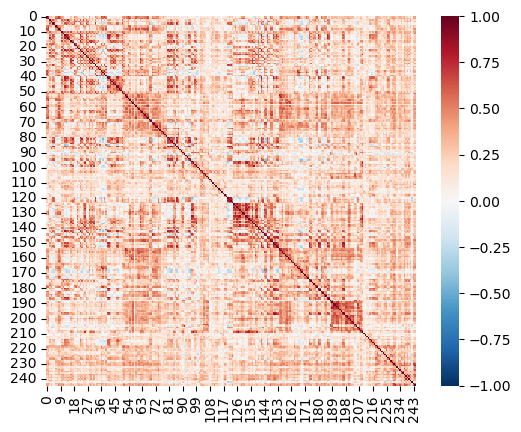

In [36]:
# plot heatmap of pairwise distances obtained from the timeseries of one subject
from sklearn.metrics import pairwise_distances

rois = timeseries_sub_13281.iloc[:, 4:]
roi_corr = 1 - pairwise_distances(rois, metric='correlation')
rr = pairwise_distances(rois, metric='correlation')
sns.heatmap(roi_corr, square=True, vmin=-1, vmax=1, cmap='RdBu_r')

In [37]:
# #pip install nltools
# # plot brainnetome mask
# from nltools.data import Brain_Data
# mask = Brain_Data(os.path.join(save_dir, 'BNA-maxprob-thr25-2mm.nii' ))
# mask.plot()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

save_dir = "/Users/jpillai/Documents/test_chord"
# here we plot the average time series by network (Yeo 7 network)
# Load the single subject time series
df_data = pd.read_csv(os.path.join(save_dir, 'ROIs2ROIs', 'timeseries', '13281_2016-10-14_rois_timeseries.csv'), header=None)

# Create a mapping dictionary from df_networks
network_mapping = df_networks.set_index('Label')['Yeo_7network'].to_dict()

# Map the Yeo_7network values to df_data based on the mapping dictionary
df_data['Yeo_7network'] = df_data.iloc[:, 0].map(network_mapping)

# Exclude the first column which is the label and the next 3 columns
data_to_plot = df_data.drop(columns=['Yeo_7network']).iloc[:, 4:]

# Group the time series data by network and calculate the mean
grouped_data = data_to_plot.groupby(df_data['Yeo_7network']).mean()

# Exclude the network with label '0'
grouped_data = grouped_data.drop(0, errors='ignore')

# Plotting
plt.figure(figsize=(12, 6))

# Loop through each network and plot the average time series
for network_label, values in grouped_data.iterrows():
    if network_label != 0:  # Exclude the network with label '0'
        network_name = Yeo_7network_names.get(network_label, f'Network {network_label}')
        plt.plot(range(1, len(values) + 1), values, label=network_name)

# Setting x and y axis range
x_min, x_max = 0, 580  # adjust these values as required
y_min, y_max = 7000, 9250  # adjust these values as required

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title("Average Time Series per Network")
plt.xlabel("Time")
plt.ylabel("Average Amplitude")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Network Names')
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jpillai/Documents/test_chord/ROIs2ROIs/timeseries/13281_2016-10-14_rois_timeseries.csv'

In [ ]:
# I want to calculate the Intra‐ and internetworks functional connections. 
#They are measured using Pearson's correlation coefficient. First, the correlation coefficient was calculated 
#between the mean time series of each pair of the ROIs that belon to one network for each participant. 
# Then, the intranetwork connection is calculated by averaging the correlation coefficients of all ROI pairs in each particular network. 
# Internetwork connection is computed by averaging the correlation coefficients of all ROI pairs belonging to different networks.
# 1.Intra-Network Connectivity:
#For each network:
#Extract the time series of all the regions in that network.
#Calculate the pairwise Pearson's correlation coefficient between each pair of regions within that network.
#Average the correlation coefficients to get the intra-network connectivity.
# 2.Inter-Network Connectivity:
#For each pair of distinct networks:
#Extract the time series of all the regions in both networks.
#Calculate the pairwise Pearson's correlation coefficient between each pair of regions across the two networks.
#Average the correlation coefficients to get the inter-network connectivity.

In [ ]:
import numpy as np

# Create an empty dictionary to store intra-network connectivity values
intra_network_connectivity = {}

# Calculate the intra-network connectivity for each network
unique_networks = df_data['Yeo_7network'].unique()

for network in unique_networks:
    # Exclude the network with label '0'
    if network != 0:
        # Extract time series data for the current network
        network_data = data_to_plot[df_data['Yeo_7network'] == network]
        
        # Calculate the correlation matrix for the current network
        correlation_matrix = network_data.transpose().corr()
        
        # Average the correlation values (excluding the diagonal)
        average_corr = np.mean(correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)])
        
        # Store the average correlation value in the dictionary
        intra_network_connectivity[network] = average_corr

#print(intra_network_connectivity)


In [ ]:
# Create an empty dictionary to store inter-network connectivity values
inter_network_connectivity = {}

# Calculate the inter-network connectivity for each pair of distinct networks
for i, network_i in enumerate(unique_networks):
    for j, network_j in enumerate(unique_networks):
        # Only consider pairs of distinct networks and exclude network '0'
        if network_i != network_j and network_i != 0 and network_j != 0:
            data_i = data_to_plot[df_data['Yeo_7network'] == network_i]
            data_j = data_to_plot[df_data['Yeo_7network'] == network_j]
            
            # Calculate pairwise correlations between the two networks
            correlation_values = []
            for index_i, row_i in data_i.iterrows():
                for index_j, row_j in data_j.iterrows():
                    correlation_values.append(row_i.corr(row_j))
            
            # Average the correlation values
            average_corr = np.mean(correlation_values)
            
            # Store the average correlation value in the dictionary
            key = (network_i, network_j)
            inter_network_connectivity[key] = average_corr

#print(inter_network_connectivity)


In [ ]:
# Extract the participant ID from the filename
participant_id = os.path.basename(os.path.join(save_dir, 'ROIs2ROIs', 'timeseries', '13281_2016-10-14_rois_timeseries.csv')).split('_')[0]

# Create a unique filename using the participant ID
filename_intra = f"{participant_id}_intra_network_connectivity.csv"
filename_inter = f"{participant_id}_inter_network_connectivity.csv"

# Convert dictionaries to DataFrame and save as CSV
intra_df = pd.DataFrame(list(intra_network_connectivity.items()), columns=['Network', 'Average_Correlation'])
intra_df.to_csv(os.path.join(save_dir, filename_intra), index=False)

inter_df = pd.DataFrame(list(inter_network_connectivity.items()), columns=['Network_Pair', 'Average_Correlation'])
inter_df.to_csv(os.path.join(save_dir, filename_inter), index=False)

print(f"Saved intra-network connectivity results to {filename_intra}")
print(f"Saved inter-network connectivity results to {filename_inter}")


Saved intra-network connectivity results to 13281_intra_network_connectivity.csv
Saved inter-network connectivity results to 13281_inter_network_connectivity.csv


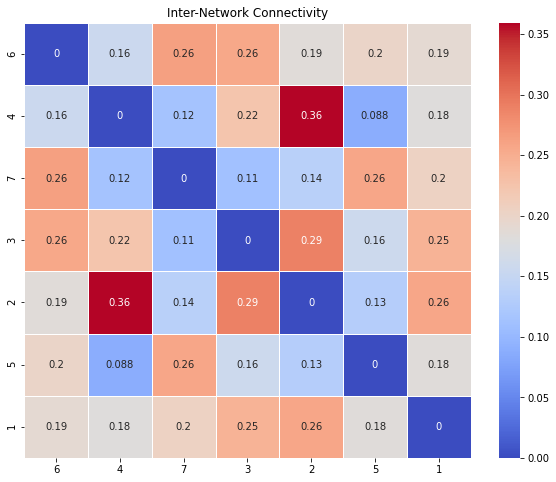

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataframe to represent the matrix
matrix_df = pd.DataFrame(np.zeros((len(unique_networks), len(unique_networks))),
                         index=unique_networks, columns=unique_networks)

# Populate the dataframe using the inter_network_connectivity dictionary
for key, value in inter_network_connectivity.items():
    network_i, network_j = key
    matrix_df.loc[network_i, network_j] = value
    matrix_df.loc[network_j, network_i] = value  # The matrix is symmetric

# Remove rows and columns corresponding to network '0' if present
if 0 in matrix_df.index:
    matrix_df.drop(0, axis=0, inplace=True)
    matrix_df.drop(0, axis=1, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, cmap="coolwarm", annot=True, linewidths=.5)
plt.title("Inter-Network Connectivity")
plt.show()






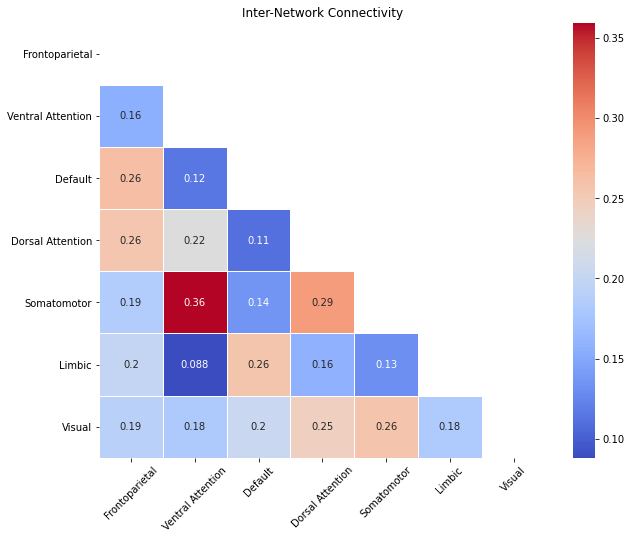

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a dataframe to represent the matrix
matrix_df = pd.DataFrame(np.zeros((len(unique_networks), len(unique_networks))),
                         index=unique_networks, columns=unique_networks)

# Populate the dataframe using the inter_network_connectivity dictionary
for key, value in inter_network_connectivity.items():
    network_i, network_j = key
    matrix_df.loc[network_i, network_j] = value
    matrix_df.loc[network_j, network_i] = value  # The matrix is symmetric

# Remove rows and columns corresponding to network '0' if present
if 0 in matrix_df.index:
    matrix_df.drop(0, axis=0, inplace=True)
    matrix_df.drop(0, axis=1, inplace=True)

# Create a mask for the lower triangle of the heatmap
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, cmap="coolwarm", annot=True, linewidths=.5, mask=mask)

# Set tick labels using the Yeo_7network_names dictionary
network_labels = [Yeo_7network_names.get(network, f'Network {network}') for network in matrix_df.index]
plt.xticks(ticks=np.arange(0.5, len(matrix_df.index)), labels=network_labels, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(matrix_df.index)), labels=network_labels, rotation=0)

plt.title("Inter-Network Connectivity")
plt.show()


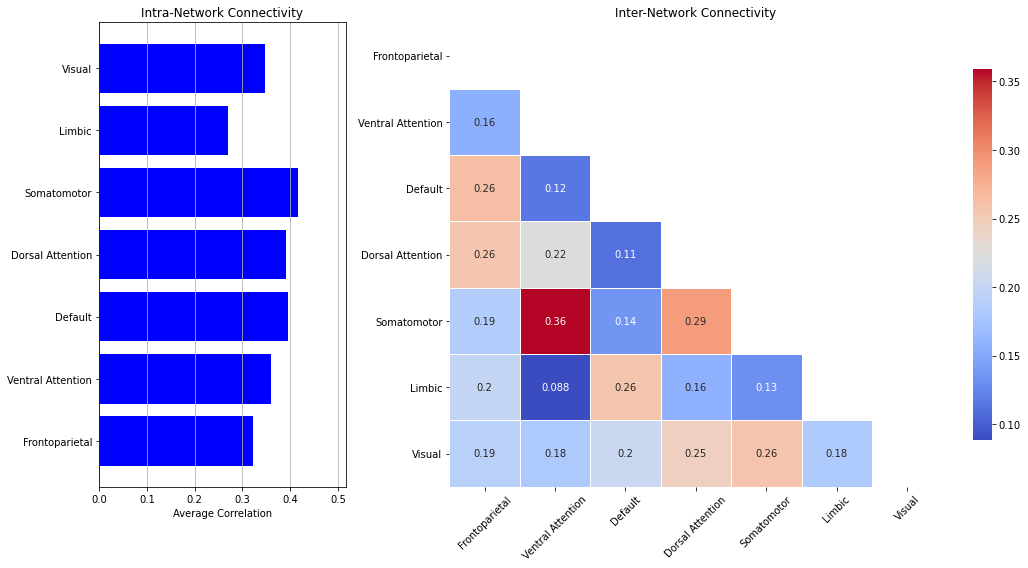

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate intra-network connectivity
intra_network_connectivity = {}
for network in unique_networks:
    if network != 0:
        data_network = data_to_plot[df_data['Yeo_7network'] == network]
        correlation_values = []
        for index_i, row_i in data_network.iterrows():
            for index_j, row_j in data_network.iterrows():
                if index_i != index_j:
                    correlation_values.append(row_i.corr(row_j))
        average_corr = np.mean(correlation_values)
        intra_network_connectivity[network] = average_corr

# Create a dataframe to represent the matrix
matrix_df = pd.DataFrame(np.zeros((len(unique_networks), len(unique_networks))),
                         index=unique_networks, columns=unique_networks)

# Populate the dataframe using the inter_network_connectivity dictionary
for key, value in inter_network_connectivity.items():
    network_i, network_j = key
    matrix_df.loc[network_i, network_j] = value
    matrix_df.loc[network_j, network_i] = value  # The matrix is symmetric

# Remove rows and columns corresponding to network '0' if present
if 0 in matrix_df.index:
    matrix_df.drop(0, axis=0, inplace=True)
    matrix_df.drop(0, axis=1, inplace=True)

# Create a mask for the lower triangle of the heatmap
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

# Initialize a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [0.4, 1]})

# Plot intra-network connectivity on ax1
network_labels = [Yeo_7network_names.get(network, f'Network {network}') for network in matrix_df.index]
ax1.barh(network_labels, [intra_network_connectivity[network] for network in matrix_df.index], color='blue')
ax1.set_title('Intra-Network Connectivity')
ax1.set_xlim(0, max(intra_network_connectivity.values()) + 0.1)
ax1.set_xlabel('Average Correlation')
ax1.grid(axis='x')

# Plot heatmap on ax2
sns.heatmap(matrix_df, cmap="coolwarm", annot=True, linewidths=.5, mask=mask, ax=ax2, cbar_kws={"shrink": 0.8})

# Adjust heatmap tick labels using the Yeo_7network_names dictionary
ax2.set_xticks(np.arange(0.5, len(matrix_df.index)))
ax2.set_xticklabels(network_labels, rotation=45)
ax2.set_yticks(np.arange(0.5, len(matrix_df.index)))
ax2.set_yticklabels(network_labels, rotation=0)
ax2.set_title("Inter-Network Connectivity")

plt.tight_layout()
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
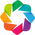

In [40]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

# # Create a matrix from the inter_network_connectivity dictionary
# num_networks = len(Yeo_7network_names)
# matrix = np.zeros((num_networks, num_networks))
# for (i, j), value in inter_network_connectivity.items():
#     matrix[i-1, j-1] = value

# # Create labels for the nodes
# labels = list(Yeo_7network_names.values())
# # Create the Chord diagram
# chord = hv.Chord((matrix, labels)).select(value=(0.1, None))
# chord.opts(opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
#                       labels='name', node_color=dim('index').str()))



In [ ]:
import pandas as pd

# Load the data and network mappings
df_data = pd.read_csv(os.path.join(save_dir, 'ROIs2ROIs', 'timeseries', '13281_2016-10-14_rois_timeseries.csv'), header=None)

# Create a mapping dictionary from df_networks
network_mapping = df_networks.set_index('Label')['Yeo_7network'].to_dict()

# Map the Yeo_7network values to df_data based on the mapping dictionary
df_data['Yeo_7network'] = df_data.iloc[:, 0].map(network_mapping)

# Exclude rows with network = 0
df_data = df_data[df_data['Yeo_7network'] != 0]

# Extract time series data for correlations
data_for_correlation = df_data.drop(columns='Yeo_7network').iloc[:, 4:]

# Initialize an empty dictionary to store correlation matrices for each network
network_correlation_matrices = {}

# Calculate the correlation matrix for each network
unique_networks = df_data['Yeo_7network'].unique()
for network in unique_networks:
    # Extract data for the current network
    network_data = data_for_correlation[df_data['Yeo_7network'] == network]
    
    # Compute the correlation matrix and store it in the dictionary
    network_correlation_matrices[network] = network_data.transpose().corr()

# Save correlation matrices
for network, matrix in network_correlation_matrices.items():
    # Reset the index and columns of the matrix to match the actual region labels
    regions_in_network = df_data[df_data['Yeo_7network'] == network].iloc[:, 0].unique()
    matrix.index = regions_in_network
    matrix.columns = regions_in_network
    
    # Save to CSV using network names
    matrix_name = Yeo_7network_names.get(network, f'Network_{network}')
    matrix.to_csv(f"correlation_matrix_{matrix_name}.csv")
    
# Compute and save covariance values between mean time series of networks
covariance_values = {}

for i, network_i in enumerate(unique_networks):
    for j, network_j in enumerate(unique_networks):
        # This will now consider all pairs, including i=j
        mean_time_series_i = data_for_correlation[df_data['Yeo_7network'] == network_i].mean(axis=0)
        mean_time_series_j = data_for_correlation[df_data['Yeo_7network'] == network_j].mean(axis=0)
        
        covariance_value = mean_time_series_i.cov(mean_time_series_j)
        
        
        # Get the network names
        matrix_name_i = Yeo_7network_names.get(network_i, f'Network_{network_i}')
        matrix_name_j = Yeo_7network_names.get(network_j, f'Network_{network_j}')
        
        covariance_values[f"{matrix_name_i}_vs_{matrix_name_j}"] = covariance_value

# If you want to save the covariance values:
pd.Series(covariance_values).to_csv("networks_covariance_values.csv")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# [Your code goes here until the computation of covariance_values]

# Create a covariance matrix for plotting
matrix_size = len(unique_networks)
cov_matrix = np.zeros((matrix_size, matrix_size))

for i, net_i in enumerate(unique_networks):
    for j, net_j in enumerate(unique_networks):
        matrix_name_i = Yeo_7network_names.get(net_i, f'Network_{net_i}')
        matrix_name_j = Yeo_7network_names.get(net_j, f'Network_{net_j}')
        key = f"{matrix_name_i}_vs_{matrix_name_j}"
        cov_matrix[i, j] = covariance_values[key]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', 
            xticklabels=[Yeo_7network_names[n] for n in unique_networks],
            yticklabels=[Yeo_7network_names[n] for n in unique_networks])
plt.title('Covariance Between Networks')
plt.show()


In [ ]:
import numpy as np

# Get unique network labels excluding 0
unique_networks = [network for network in df_data['Yeo_7network'].unique() if network != 0]

# Create a dictionary to store the correlation matrices for each network
network_correlation_matrices = {}

# Directory where the matrices will be saved
#save_dir_matrices = "path_to_save_directory"

# Check if the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loop through each network and save its corresponding matrix
for network, matrix in network_correlation_matrices.items():
    print(network)
    network_name = Yeo_7network_names.get(network, f'Network {network}')
    matrix.to_csv(os.path.join(save_dir, f"{network_name}_correlation_matrix.csv"))

    


In [ ]:
for network, matrix in network_correlation_matrices.items():
    # Reset the index and columns of the matrix to match your network_mapping keys
    regions_in_network = df_data[df_data['Yeo_7network'] == network].iloc[:, 0].unique()
    matrix.index = regions_in_network
    matrix.columns = regions_in_network
    print(network)
    # Save to CSV
    matrix.to_csv(f"correlation_matrix_network_{network}.csv")

In [ ]:
# load the ROI2ROI correaltion coefficients from the functional pipeline 
# in this example we used the Brainnetome atlas
# I keep the ROis2Rois in 2 different folders based on the group
# here I am just uploading the subjects and appending by group.
# I create an average that I can keep for visualization purpose

# Filter out rows with label 0
#df_sorted = df_sorted[df_sorted['Yeo_7network'] != 0]

# Get the index order from the sorted dataframe
sorted_indices = df_sorted.index.tolist()

group_CTRL_dir = '/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/CTRL/'
group_rATL_dir = '/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/rATL/'

# To store the individual correlation matrices of subjects in the group
ctrl_matrices = []

# Process the first group
for filename in os.listdir(group_CTRL_dir):
    if filename.endswith("coef.csv"):  # I removed the * from the condition as it's not a valid wildcard in string methods
        subject_path = os.path.join(group_CTRL_dir, filename)
        correlation_matrix_ctrl = pd.read_csv(subject_path, header=None)
        ctrl_matrices.append(correlation_matrix_ctrl)

# Calculate the average correlation matrix for the first group
avg_matrix_ctrl = np.mean(ctrl_matrices, axis=0)

# Use this index to rearrange the rows in avg_matrix_ctrl
avg_matrix_ctrl_sorted = avg_matrix_ctrl[sorted_indices, :][:, sorted_indices]


# Repeat the process for the second group
rATL_matrices = []

for filename in os.listdir(group_rATL_dir):
    if filename.endswith("coef.csv"):
        subject_path = os.path.join(group_rATL_dir, filename)
        correlation_matrix_rATL = pd.read_csv(subject_path, header=None)
        rATL_matrices.append(correlation_matrix_rATL)

avg_matrix_rATL = np.mean(rATL_matrices, axis=0)


# Use this index to rearrange the rows in avg_matrix_ctrl
avg_matrix_rATL_sorted = avg_matrix_rATL[sorted_indices, :][:, sorted_indices]



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Get the subregion names as labels
labels = df_sorted['Yeo_7network'].tolist()

# Heatmap for CTRL group
avg_matrix_ctrl = avg_matrix_ctrl_sorted
sns.heatmap(avg_matrix_ctrl, cmap='coolwarm', center=0, cbar=True, ax=ax1, yticklabels=labels, xticklabels=labels)
ax1.set_title('Average Correlation Matrix - CTRL Group')
ax1.set_xticks(ax1.get_xticks()[::5])  # Reduce the frequency of x-tick labels for better readability
ax1.set_yticks(ax1.get_yticks()[::5])  # Reduce the frequency of y-tick labels for better readability

# Heatmap for rATL group
avg_matrix_rATL = avg_matrix_rATL_sorted
sns.heatmap(avg_matrix_rATL, cmap='coolwarm', center=0, cbar=True, ax=ax2, yticklabels=labels, xticklabels=labels)
ax2.set_title('Average Correlation Matrix - rATL Group')
ax2.set_xticks(ax2.get_xticks()[::5])  # Reduce the frequency of x-tick labels for better readability
ax2.set_yticks(ax2.get_yticks()[::5])  # Reduce the frequency of y-tick labels for better readability

# Show the combined figure
plt.tight_layout()
plt.show()


In [ ]:

df_subj = pd.read_csv(os.path.join(save_dir, 'ROIs2ROIs','CTRL', '13281_2016-10-14_rois_roi_cor_coef.csv'), header=None)
correlation_matrix = df_subj

In [ ]:
# Here I define a function to create the intra and inter network correlation coefficient
# using the Yeo networks
# I have an option to introduce a threshold and/or a range of threshols 
# it saved the coefficent for each subject in the save directory folder
# I CAN USE THIS FUNCTION TO PLOT THE AVERAGE INTRA AND INTER COEFFICIENTS FOR EACH NETWORK >> TALK WITH JANAHVI

def compute_network_correlations(correlation_matrix, df_networks, thresholds, filename):
 
    # Use this index to rearrange the rows in avg_matrix_ctrl
     # Consider only the 210x210 submatrix
    
    correlation_matrix = correlation_matrix.iloc[:210, :210]
    
    # Filter out regions with network == 0
    df_networks = df_networks[df_networks['Yeo_7network'] != 0]
    # Group the regions by their "Yeo_7network" label
    grouped = df_networks.groupby('Yeo_7network') #there is a column called Label in the csv file
    
    # Store results for each threshold
    results = {}

    for thresh in thresholds:
        avg_correlation = {}
        print(thresh)
         # For each source network
        for source_label, source_group in grouped:
            source_indices = source_group['Label'] - 1  # Adjusting for 0-based index
            
            # For each target network
            for target_label, target_group in grouped:
                target_indices = target_group['Label'] - 1  # Adjusting for 0-based index

                # Extract the sub-matrix for correlations between source and target networks
                sub_matrix = correlation_matrix.iloc[source_indices, target_indices]
                
                # If the source and target networks are the same (intra-network), we exclude the diagonal
                # we have two similar triangles but averaging on both of them it does not change the total average 
                if source_label == target_label:
                    np.fill_diagonal(sub_matrix.values, np.nan)  # Set diagonal values to NaN

                # Extract values from sub-matrix that are greater than threshold
                values_above_thresh = sub_matrix.values[sub_matrix > thresh]

                # Compute the average of these values
                if len(values_above_thresh) > 0:
                    avg_value = values_above_thresh.mean()
                else:
                    avg_value = np.nan

                # Create a key for the source-target network pair
                key = f"{source_label}->{target_label}"
                avg_correlation[key] = avg_value
                print(key)

        results[thresh] = avg_correlation

    # I think here I need to consider that for example 1>2 will be the same as 2>1!! this will affect the multiple comparisons
    # Print results
    #for thresh, avg_vals in results.items():
        #print(f"Threshold: {thresh}, Averages: {avg_vals}")
    # save the results in a csf file

    # Convert the results dictionary to a DataFrame
    df_results = pd.DataFrame(results).T  # Transpose to have thresholds as rows

    
    # Derive the save path from the filename and desired save directory
   
    save_path = os.path.join(os.path.join(save_dir, 'coef_results_new'), f"{os.path.splitext(filename)[0]}_results.csv")
    df_results.to_csv(save_path, index=False)
    
    return df_results

In [ ]:
# Process a single group and return results for each participant
# here I am setting a variable threshold from 0 to 0.5 with a step of 0.05
# THIS IS A TRICKY STEP AS THE RESULTS MAY DEPEND FIRST BY THE THRESHOLD BUT ALSO BECAUSE IF THERE IS ATROPHY THE CONNECTIVITY COULD LOWER DOWN
import pdb
def process_group(directory, df_networks):
    
    group_results = []
    for filename in os.listdir(directory):
        if filename.endswith("coef.csv"):
            subject_path = os.path.join(directory, filename)
            correlation_matrix = pd.read_csv(subject_path, header=None)
            participant_results = compute_network_correlations(correlation_matrix, df_networks, thresholds, filename)
            
            # Append the participant's results to the group results
            group_results.append(participant_results)

    return group_results


In [ ]:
# Process both groups

thresholds = np.arange(0, 0.5, 0.05)

df_networks = pd.read_csv('/Users/malumandelli/Documents/MATLAB/voxel_stats_data/subregions_Yeo7networks.csv')
ctrl_group_results = process_group(group_CTRL_dir, df_networks)
rATL_group_results = process_group(group_rATL_dir, df_networks)

In [ ]:
thresholds = np.arange(0, 0.5, 0.05)
ctrl_results = []
for matrix, filename in zip(ctrl_matrices, os.listdir(group_CTRL_dir)):
    if filename.endswith("coef.csv"):
        result = compute_network_correlations(matrix, df_networks, thresholds, filename)
        ctrl_results.append(result)

rATL_results = []
for matrix, filename in zip(rATL_matrices, os.listdir(group_rATL_dir)):
    if filename.endswith("coef.csv"):
        result = compute_network_correlations(matrix, df_networks, thresholds, filename)
        rATL_results.append(result)

In [ ]:
from scipy.stats import ttest_ind
# define a function for statistical comparisons between groups
from numpy import std, sqrt
def perform_statistical_comparison(ctrl_data, rATL_data):
    # ctrl_data and rATL_data are lists of DataFrames, each DataFrame corresponding to a subject's results across thresholds
    
    # Dictionary to store t-values and p-values for each threshold
    t_values_by_threshold = {}
    p_values_by_threshold = {}
    d_values_by_threshold = {}
    
    # Assuming all subjects have the same thresholds, take the first subject's thresholds as reference
    thresholds = ctrl_data[0].index

    for thresh in thresholds:
        t_values = {}
        p_values = {}
        d_values = {}

        columns = ctrl_data[0].columns
        for col in columns:
            ctrl_column_values = [df.loc[thresh, col] for df in ctrl_data]
            rATL_column_values = [df.loc[thresh, col] for df in rATL_data]

            t_stat, p_val = ttest_ind(ctrl_column_values, rATL_column_values, nan_policy='omit')  # omitting NaN values

            # Calculate Cohen's d
            pooled_std = sqrt(((len(ctrl_column_values) - 1) * std(ctrl_column_values, ddof=1)**2 + (len(rATL_column_values) - 1) * std(rATL_column_values, ddof=1)**2) / (len(ctrl_column_values) + len(rATL_column_values) - 2))
            d_val = (mean(ctrl_column_values) - mean(rATL_column_values)) / pooled_std
            
            t_values[col] = t_stat
            p_values[col] = p_val
            d_values[col] = d_val  # store effect size

        t_values_by_threshold[thresh] = t_values
        p_values_by_threshold[thresh] = p_values
        d_values_by_threshold[thresh] = d_values  # include effect sizes in the results


    return t_values_by_threshold, p_values_by_threshold, d_values_by_threshold  # return effect sizes as well


In [ ]:
from numpy import std, sqrt, mean

t_values_by_threshold, p_values_by_threshold, d_values_by_threshold = perform_statistical_comparison(ctrl_results, rATL_results)

# Convert the results into DataFrames for easy saving
df_t_values = pd.DataFrame(t_values_by_threshold).T  # Transpose to have thresholds as rows
df_p_values = pd.DataFrame(p_values_by_threshold).T
df_d_values = pd.DataFrame(d_values_by_threshold).T

# Saving to CSV
save_dir = '/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/'
df_t_values.to_csv(os.path.join(save_dir, 't_values_by_threshold.csv'))
df_p_values.to_csv(os.path.join(save_dir, 'p_values_by_threshold.csv'))
df_d_values.to_csv(os.path.join(save_dir, 'd_values_by_threshold.csv'))

In [ ]:
# Integrating the results across thresholds (i.e., computing the area under the curve, or AUC) can be a meaningful way
#to combine the information from different thresholds if you assume that the information at each threshold is equally valuable. 
#This approach gives you a single measure that summarizes the effect across all thresholds.
from scipy.stats import ttest_ind
from scipy.integrate import trapz

def cohen_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(x1), np.mean(x2)
    return (u1 - u2) / s

def compute_auc(values_by_threshold):
    thresholds = list(values_by_threshold.keys())
    values = list(values_by_threshold.values())
    return trapz(values, thresholds)

def perform_statistical_comparison_with_effect_size(ctrl_data, rATL_data):
    t_values_by_threshold, p_values_by_threshold, d_values_by_threshold = perform_statistical_comparison(ctrl_data, rATL_data)
    
    # Compute AUC for t-values, p-values, and d-values
    auc_t_values = {col: compute_auc({thresh: t_values_by_threshold[thresh][col] for thresh in t_values_by_threshold}) 
                    for col in t_values_by_threshold[0]}
    auc_p_values = {col: compute_auc({thresh: p_values_by_threshold[thresh][col] for thresh in p_values_by_threshold}) 
                    for col in p_values_by_threshold[0]}
    auc_d_values = {col: compute_auc({thresh: d_values_by_threshold[thresh][col] for thresh in d_values_by_threshold}) 
                    for col in d_values_by_threshold[0]}
    
    return auc_t_values, auc_p_values, auc_d_values



In [ ]:
# Call the updated function to get t-values, p-values, d-values and their AUCs
auc_t_values, auc_p_values, auc_d_values = perform_statistical_comparison_with_effect_size(ctrl_results, rATL_results)

# Convert dictionaries to DataFrames for easy saving
df_auc_t_values = pd.DataFrame([auc_t_values], index=['AUC'])
df_auc_p_values = pd.DataFrame([auc_p_values], index=['AUC'])
df_auc_d_values = pd.DataFrame([auc_d_values], index=['AUC'])  # New line to convert d_values AUC

# Saving to CSV
df_auc_t_values.to_csv(os.path.join(save_dir, 'auc_t_values.csv'))
df_auc_p_values.to_csv(os.path.join(save_dir, 'auc_p_values.csv'))
df_auc_d_values.to_csv(os.path.join(save_dir, 'auc_d_values.csv'))  # New line to save d_values AUC

In [ ]:
#here I apply multi comparisons correction
from statsmodels.stats import multitest

# Flatten the p-values DataFrame into a 1D array
p_values_array = df_auc_p_values.values.flatten()

# Apply FDR correction
rejected, pvals_corrected = multitest.fdrcorrection(p_values_array, alpha=0.05)

# Reshape the corrected p-values back into the original shape
df_pvals_corrected = pd.DataFrame(pvals_corrected.reshape(df_auc_p_values.shape),
                                  index=df_auc_p_values.index,
                                  columns=df_auc_p_values.columns)

# Reshape the rejected decisions back into the original shape
df_rejected = pd.DataFrame(rejected.reshape(df_auc_p_values.shape),
                           index=df_auc_p_values.index,
                           columns=df_auc_p_values.columns)

# Save the corrected p-values to a CSV file
df_pvals_corrected.to_csv("/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/corrected_p_values.csv", index=True)

# Save the rejection decisions to a CSV file
df_rejected.to_csv("/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/rejected_decisions.csv", index=True)

In [ ]:
# plotting bar plots of the significant data

df_d_values = pd.read_csv('/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/auc_d_values.csv', index_col=0) # If the first column in your CSV is the index
df_pvals_corrected = pd.read_csv('/Users/malumandelli/Documents/MATLAB/voxel_stats_data/ROIs2ROIs/corrected_p_values.csv', index_col=0)

d_values = df_d_values.loc['AUC'].values
label = df_d_values.columns
# Here, I assume a threshold of 0.05 for significance after correction
#significant_indices = [i for i, p in enumerate(df_pvals_corrected) if p < 0.05]


In [ ]:
d_values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to determine bar color based on the label
def get_color(label):
    if '1->1' in label or '2->2' in label or '3->3' in label or '4->4' in label or '5->5' in label or '6->6' in label or '7->7' in label:
        return 'blue'
    else:
        return 'skyblue'
    
# Assuming that both datasets are organized with the same columns
columns = df_d_values.columns

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Set the bar positions
bar_positions = np.arange(len(columns))

# Bar heights are the effect sizes
bar_heights = df_d_values.loc['AUC'].values

# Plot the bars with specific colors
bars = ax.bar(bar_positions, bar_heights, color=[get_color(col) for col in columns])

# Loop over each bar and corresponding p-value to add an asterisk if p < 0.05
for i, bar in enumerate(bars):
    if df_pvals_corrected.loc['AUC', columns[i]] < 0.05:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height, '*', ha='center', va='bottom', color='black', fontsize=14)

# Add the label_names list to the side of the plot
label_texts = [f"{k}: {v}" for k, v in networks_names.items()]
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 1, "\n".join(label_texts), transform=ax.transAxes, verticalalignment='top', bbox=props)

# Set the x-ticks to be the names of our columns
ax.set_xticks(bar_positions)
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.set_ylabel('Effect Size (Cohen\'s d)')
ax.set_title('Effect Size with Significance Indication')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim

hv.extension('matplotlib')
hv.output(fig='svg', size=500)

In [ ]:
# Create Pandas dataframe from an example list of dicts.
connections = pd.DataFrame.from_records([
    {'source': 1, 'target': 1, 'value':0.01},
    {'source': 1, 'target': 2, 'value':0.41},
    {'source': 1, 'target': 3, 'value':0.09},
    {'source': 1, 'target': 4, 'value':0.26},
    {'source': 1, 'target': 5, 'value':0.31},
    {'source': 1, 'target': 6, 'value':0.08},
    {'source': 1, 'target': 7, 'value':0.12},
    {'source': 2, 'target': 1, 'value':0.41},
    {'source': 2, 'target': 2, 'value':0.42},
    {'source': 2, 'target': 3, 'value':0.23},
    {'source': 2, 'target': 4, 'value':0.41},
    {'source': 2, 'target': 5, 'value':0.32},
    {'source': 2, 'target': 6, 'value':0.11},
    {'source': 2, 'target': 7, 'value':0.20},
    {'source': 3, 'target': 1, 'value':0.09},
    {'source': 3, 'target': 2, 'value':0.23},
    {'source': 3, 'target': 3, 'value':0.25},
    {'source': 3, 'target': 4, 'value':0.23},
    {'source': 3, 'target': 5, 'value':0.41},
    {'source': 3, 'target': 6, 'value':0.13},
    {'source': 3, 'target': 7, 'value':0.18},
    {'source': 4, 'target': 1, 'value':0.26},
    {'source': 4, 'target': 2, 'value':0.41},
    {'source': 4, 'target': 3, 'value':0.23},
    {'source': 4, 'target': 4, 'value':0.45},
    {'source': 4, 'target': 5, 'value':0.22},
    {'source': 4, 'target': 6, 'value':0.04},
    {'source': 4, 'target': 7, 'value':0.15},
    {'source': 5, 'target': 1, 'value':0.31},
    {'source': 5, 'target': 2, 'value':0.32},
    {'source': 5, 'target': 3, 'value':0.41},
    {'source': 5, 'target': 4, 'value':0.22},
    {'source': 5, 'target': 5, 'value':0.13},
    {'source': 5, 'target': 6, 'value':0.04},
    {'source': 5, 'target': 7, 'value':0.23},
    {'source': 6, 'target': 1, 'value':0.08},
    {'source': 6, 'target': 2, 'value':0.11},
    {'source': 6, 'target': 3, 'value':0.13},
    {'source': 6, 'target': 4, 'value':0.04},
    {'source': 6, 'target': 5, 'value':0.04},
    {'source': 6, 'target': 6, 'value':0.04},
    {'source': 6, 'target': 7, 'value':0.02},
    {'source': 7, 'target': 1, 'value':0.12},
    {'source': 7, 'target': 2, 'value':0.20},
    {'source': 7, 'target': 3, 'value':0.18},
    {'source': 7, 'target': 4, 'value':0.15},
    {'source': 7, 'target': 5, 'value':0.23},
    {'source': 7, 'target': 6, 'value':0.02},
    {'source': 7, 'target': 7, 'value':0.39},
])

In [ ]:
nodes = hv.Dataset(pd.DataFrame.from_records([
    {'index': 1, 'name': "Visual"},
    {'index': 2, 'name': "Somatomotor"},
    {'index': 3, 'name': "Dorsal Attention"},
    {'index': 4, 'name': "Ventral Attention"},
    {'index': 5, 'name': "Limbic"},
    {'index': 6, 'name': "Frontoparietal"},
    {'index': 7, 'name': "Default"},
    
]), 'index')
hv.Chord((connections, nodes)).opts(opts.Chord(labels='name'))


In [ ]:
hv.extension('bokeh')


In [ ]:
hv.Chord((connections, nodes)).opts(
    opts.Chord(cmap='Category20', edge_color=dim('source').astype(str), labels='name', node_color=dim('index').astype(str)))


In [ ]:
nodes_df

In [ ]:
threshold = 0.35
filtered_connections = connections[connections['value'] > threshold].copy()

# Convert nodes to a DataFrame for easier manipulation
nodes_df = hv.Dataset(nodes).dframe()

# Set all nodes to have an equal and normalized value
nodes_df['value'] = len(nodes_df)

# Create the Chord diagram with adjusted connections and nodes
chord_plot = hv.Chord((filtered_connections, hv.Dataset(nodes_df, 'index'))).opts(
    opts.Chord(cmap='Category20', edge_color=dim('source').astype(str), labels='name', node_color=dim('index').astype(str),
               label_text_align='center', label_text_baseline='middle', label_text_font_size='10pt')
)

chord_plot

In [ ]:
nodes_df['value'] = len(nodes_df)

In [ ]:
nodes_df